# After understanding the histogram (the audiance size /audiance guess ) we're just moving to actual what is true

In [1]:
%matplotlib notebook


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib
matplotlib.matplotlib_fname()

'/etc/matplotlibrc'

In [4]:
df = pd.read_csv("data/pseudo_facebook.tsv" , sep='\t')

In [5]:
df.head(3)

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                      0          0                   0  
2                      0          0                   0

<IPython.core.display.Javascript object>


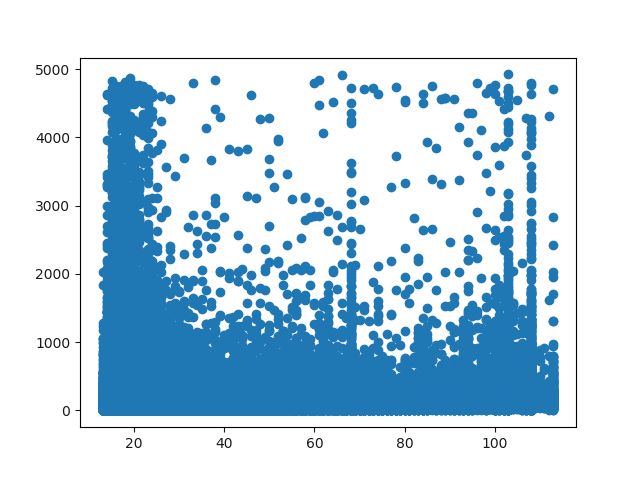

In [6]:
plt.figure()

plt.scatter(x=df.age , y=df.friend_count)
plt.show()

In [7]:
df.age.describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

<IPython.core.display.Javascript object>


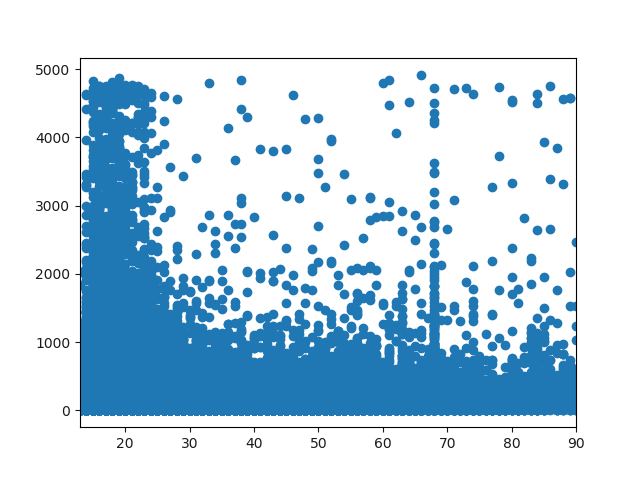

In [8]:
plt.figure()

plt.scatter(x=df.age , y=df.friend_count)
plt.xlim(xmin=13 , xmax=90)
plt.show()

<IPython.core.display.Javascript object>


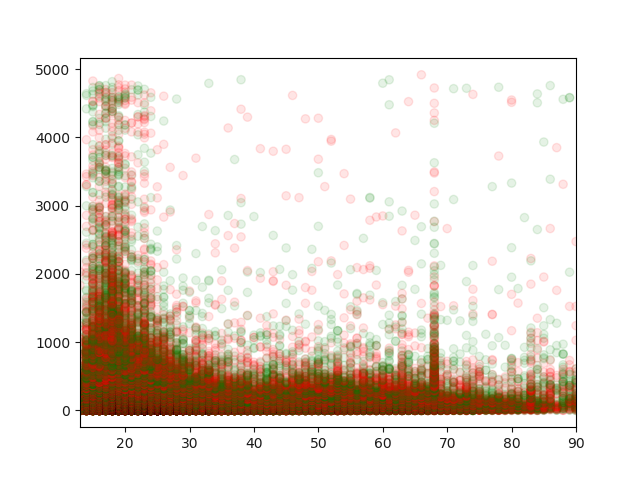

In [9]:
plt.figure()
plt.scatter(x=df.age , y=df.friend_count , color=['red' , 'green'],alpha=0.1)
plt.xlim(xmin=13 , xmax=90)
plt.show()

In [10]:
from matplotlib import ticker

In [11]:
sns.set(rc={'figure.figsize':(6,6)})


<IPython.core.display.Javascript object>


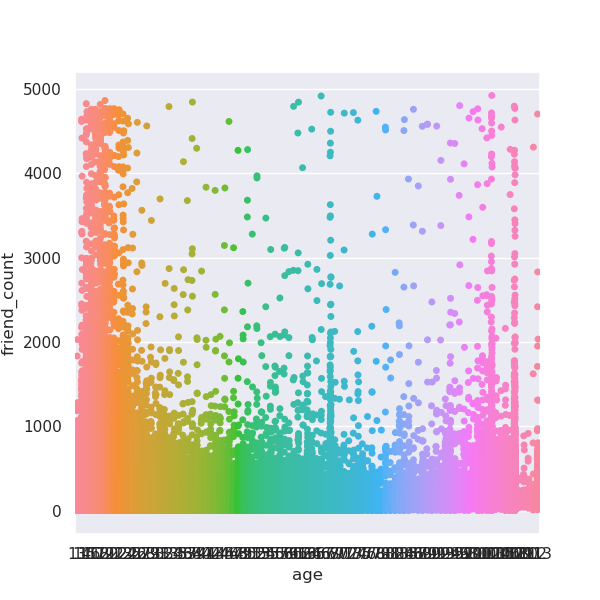

In [12]:
plt.figure()

sns.stripplot(x=df.age , y=df.friend_count)
plt.show()

<IPython.core.display.Javascript object>


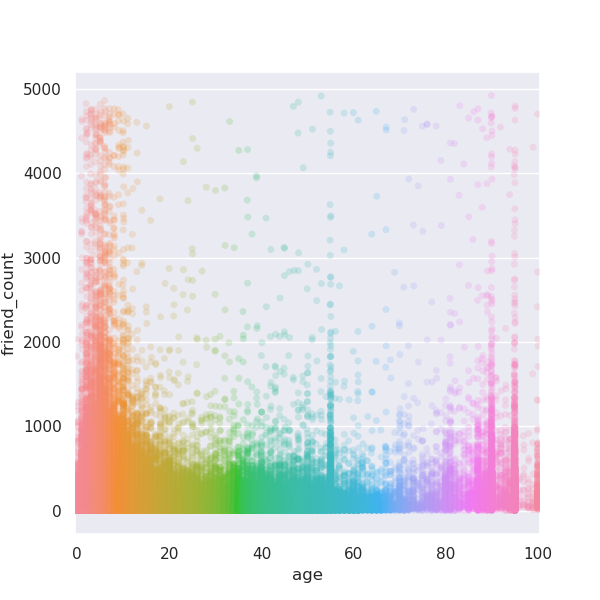

In [13]:
plt.figure()
g = sns.stripplot(x=df.age , y=df.friend_count  ,alpha=0.2)
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

<IPython.core.display.Javascript object>


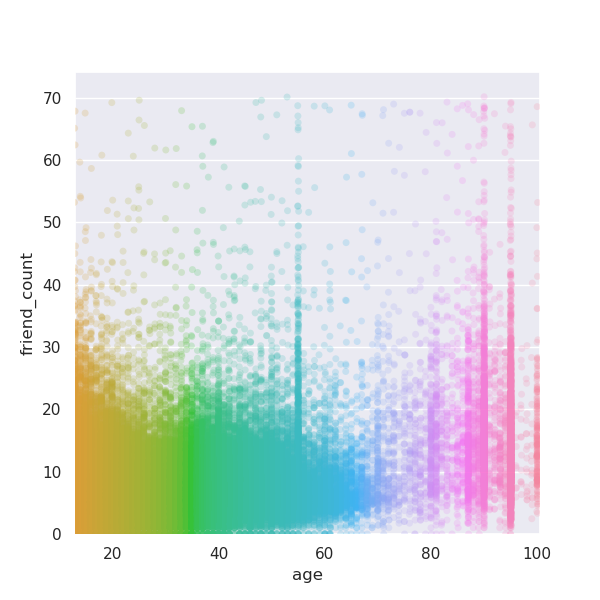

In [14]:
plt.figure()
g = sns.stripplot(x=df.age , y=np.sqrt(df.friend_count)  ,alpha=0.2)
g.set(ylim=(0,None))
g.set(xlim=(13,None))

g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())
g.yaxis.set_major_locator(ticker.MultipleLocator(10))
g.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

<IPython.core.display.Javascript object>


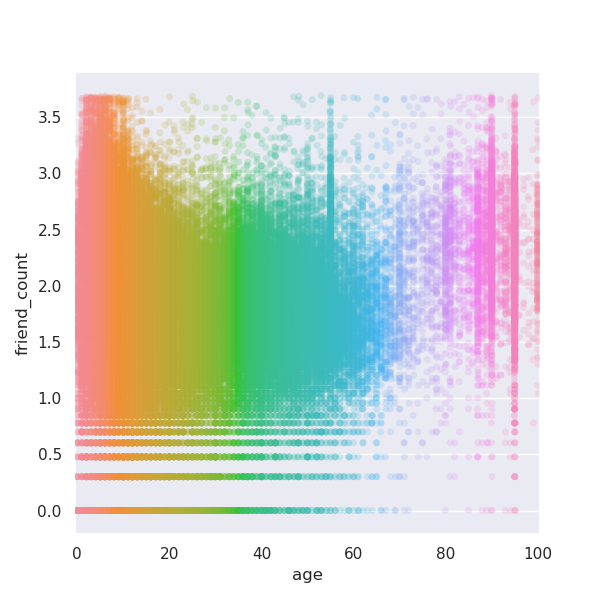

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
plt.figure()
g = sns.stripplot(x=df.age , y=np.log10(df.friend_count)  ,alpha=0.2)
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

<IPython.core.display.Javascript object>


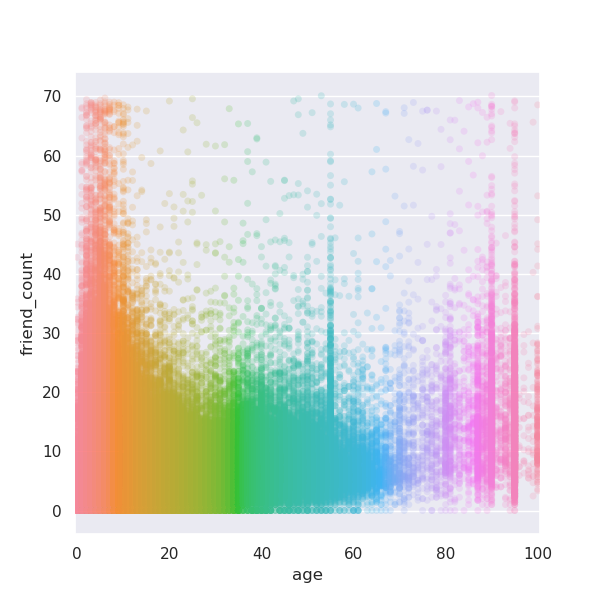

In [16]:
plt.figure()
g = sns.stripplot(x=df.age , y=np.sqrt(df.friend_count), jitter=False  ,alpha=0.2)
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

<IPython.core.display.Javascript object>


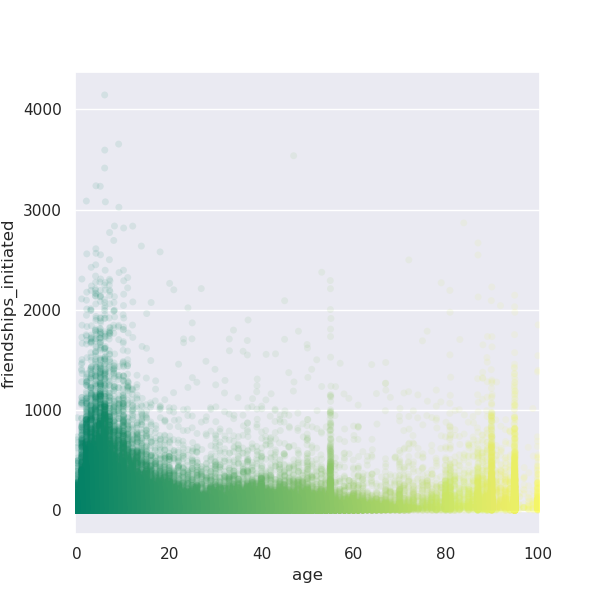

In [17]:
# Friends initiated and age
plt.figure()
g = sns.stripplot(x=df.age , y=df.friendships_initiated ,palette="summer",alpha=0.1)
g.xaxis.set_major_locator(ticker.MultipleLocator(20))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

In [18]:
df.head(1)

userid  age  dob_day  dob_year  dob_month gender  tenure  friend_count  \
0  2094382   14       19      1999         11   male   266.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0

In [19]:
# conditional means

In [20]:
age_groups = df.groupby(df.age)

In [21]:
age_groups.friend_count.mean()

age
13     164.750000
14     251.390130
15     347.692131
16     351.937135
17     350.300640
          ...    
109    172.888889
110    336.733333
111    240.222222
112    484.944444
113    334.668317
Name: friend_count, Length: 101, dtype: float64

In [22]:
age_groups.friend_count.median()

age
13      74.0
14     132.0
15     161.0
16     171.5
17     156.0
       ...  
109    120.0
110    243.0
111    166.0
112    120.5
113    206.0
Name: friend_count, Length: 101, dtype: float64

In [23]:
mean , median = age_groups.friend_count.mean() , age_groups.friend_count.median()

In [24]:
age_mean_median_df = pd.DataFrame({"mean": mean , "median":median} , )

In [25]:
age_mean_median_df.reset_index(inplace=True)

<IPython.core.display.Javascript object>


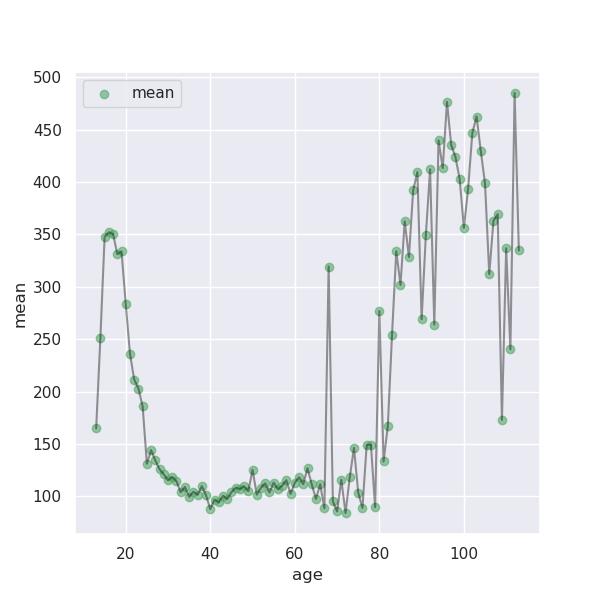

In [26]:
plt.figure()
plt.scatter(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"] ,color="g" , alpha=0.6 , label="mean")
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"],color='black' , alpha=0.4)
plt.show()


<IPython.core.display.Javascript object>


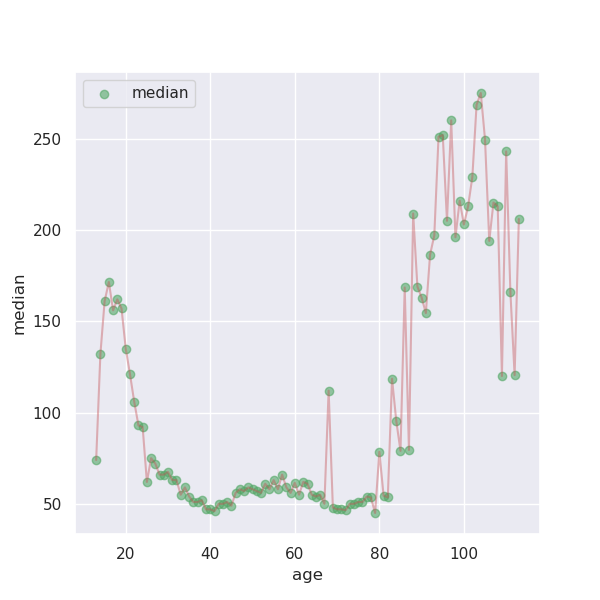

In [27]:
plt.figure()
plt.scatter(x=age_mean_median_df["age"] , y=age_mean_median_df["median"] ,color="g" , alpha=0.6 , label="median")
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["median"],color='r' , alpha=0.4)
plt.show()

<IPython.core.display.Javascript object>


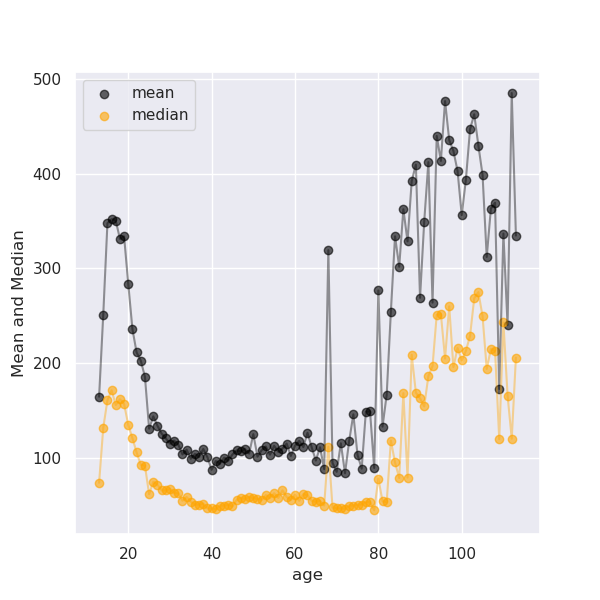

In [28]:
plt.figure()
plt.scatter(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"] ,color="black" , alpha=0.6 , label="mean")
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"],color='black' , alpha=0.4)

plt.scatter(x=age_mean_median_df["age"] , y=age_mean_median_df["median"] ,color="orange" , alpha=0.6 , label="median")
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["median"],color='orange' , alpha=0.4)
plt.ylabel("Mean and Median")
plt.show()

<IPython.core.display.Javascript object>


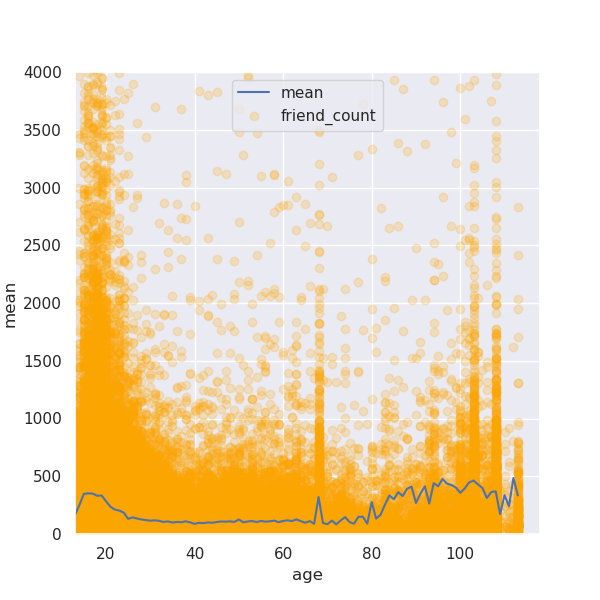

In [29]:
plt.figure()
plt.scatter(x=df.age , y=df.friend_count , color='orange' , alpha=0.2)
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"],label="mean" , markers=False)
plt.xlim(xmin=13)
plt.ylim(ymin=0 , ymax=4000)
plt.show()

<IPython.core.display.Javascript object>


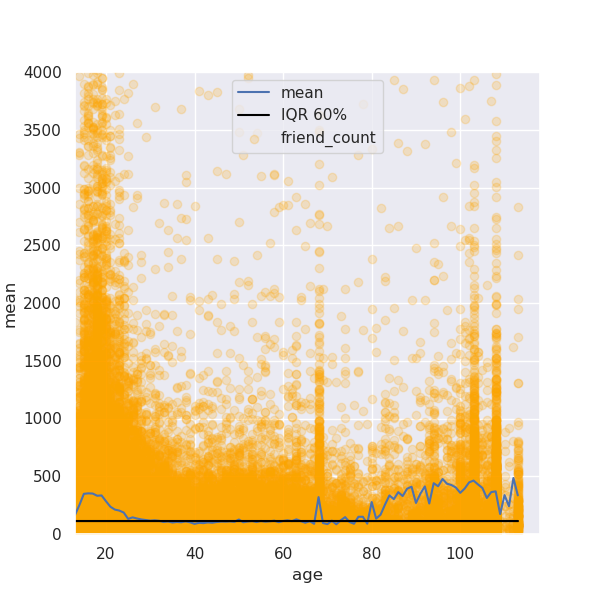

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [30]:
plt.figure()
plt.scatter(x=df.age , y=df.friend_count , color='orange' , alpha=0.2)
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"],label="mean" , markers=False)

sns.lineplot(x=df.age , y=df.friend_count.quantile(.60),label="IQR 60% ",color="black" , markers=False)
plt.xlim(xmin=13)
plt.ylim(ymin=0 , ymax=4000)
plt.show()

In [31]:
df.friend_count.quantile(.50) , df.friend_count.median()

(82.0, 82.0)

In [32]:
age_mean_median_df["quan_60"]  , age_mean_median_df["quan_90"] = age_groups.friend_count.quantile(.60) , age_groups.friend_count.quantile(.90)

<IPython.core.display.Javascript object>


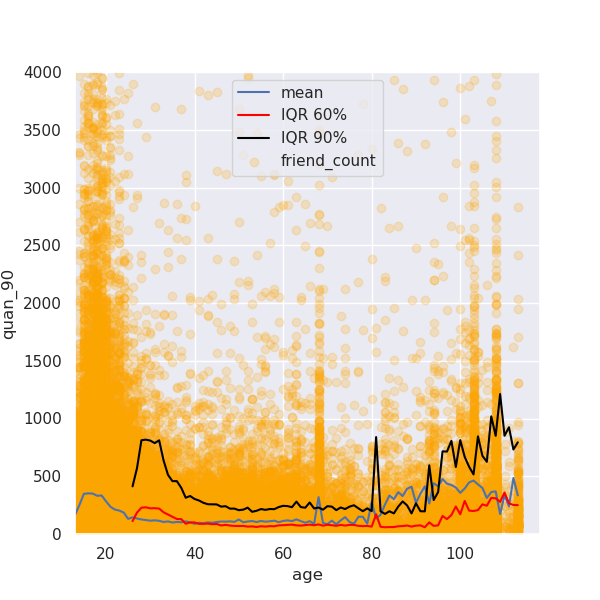

In [33]:
plt.figure()
plt.scatter(x=df.age , y=df.friend_count , color='orange' , alpha=0.2)
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["mean"],label="mean" , markers=False)

sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["quan_60"],label="IQR 60% ",color="red" , markers=False)
sns.lineplot(x=age_mean_median_df["age"] , y=age_mean_median_df["quan_90"],label="IQR 90% ",color="black" , markers=False)

plt.xlim(xmin=13)
plt.ylim(ymin=0 , ymax=4000)
plt.show()

<IPython.core.display.Javascript object>


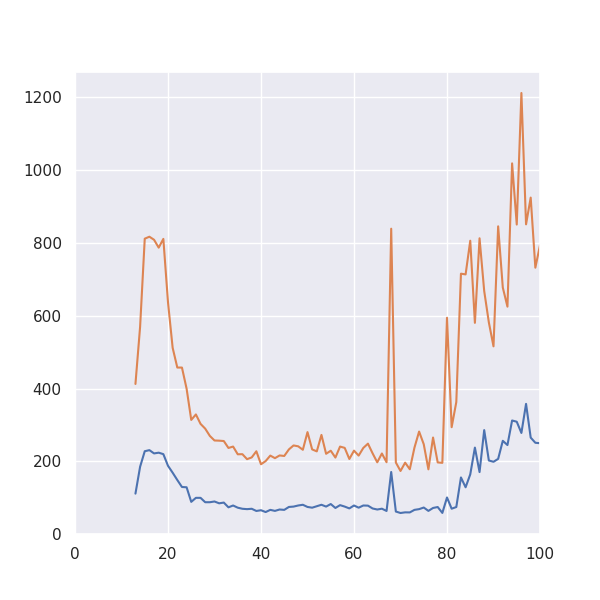

In [34]:
plt.figure()
age_mean_median_df["quan_60"].plot()
age_mean_median_df["quan_90"].plot()
plt.show()

# Corelation , describe how well a line can fit between x & y 

In [35]:
df.corr()['age']['friend_count']

-0.027407371542299025

In [36]:
df.loc[df.age <=70].corr()['age']['friend_count']

-0.1717244827024704

# ploting likes recievied vs www_like reccived

## with the simple linear model

In [37]:
df.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                      0          0                   0  
2                      0          0                   0  
3                      0          0                   0  
4                      0          0                   0

<IPython.core.display.Javascript object>


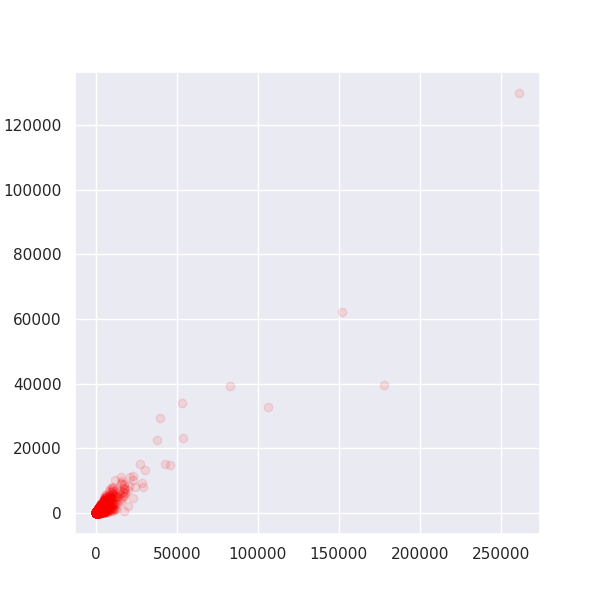

In [38]:
plt.figure()
plt.scatter(df.likes_received , df.www_likes_received , alpha=0.1 , color='red')
plt.show()

<IPython.core.display.Javascript object>


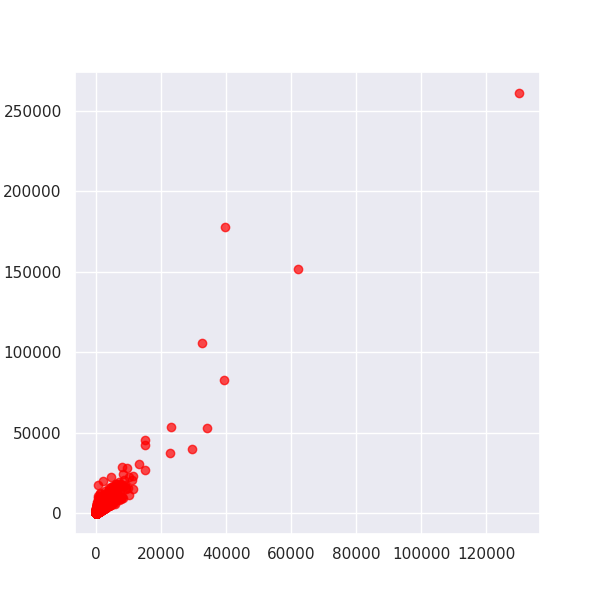

In [39]:
plt.figure()
plt.scatter(y=df.likes_received , x=df.www_likes_received , alpha=0.7 , color='red')
plt.show()

<IPython.core.display.Javascript object>


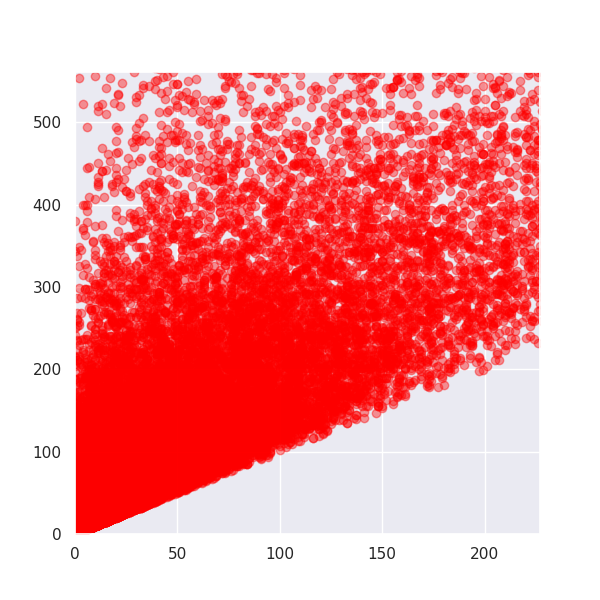

In [40]:
plt.figure()
plt.scatter(df.www_likes_received ,  df.likes_received  , alpha=0.4, color='red')
plt.xlim(xmin=0 , xmax=df.www_likes_received.quantile(.95))
plt.ylim(ymin=0 , ymax=df.likes_received.quantile(.95))

plt.show()

<IPython.core.display.Javascript object>


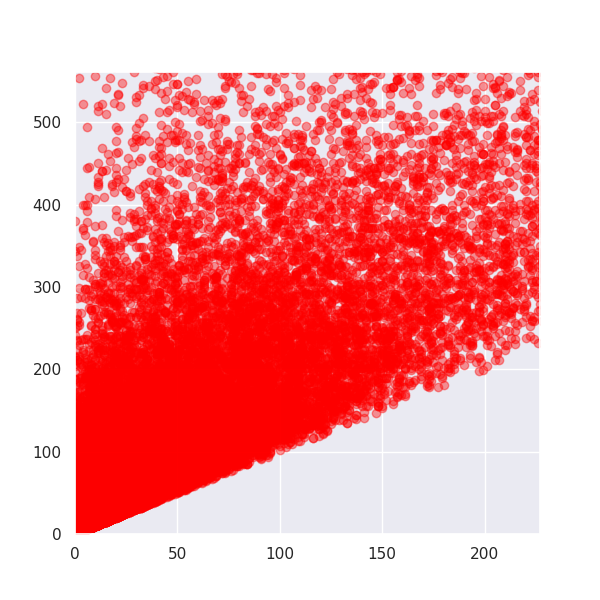

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


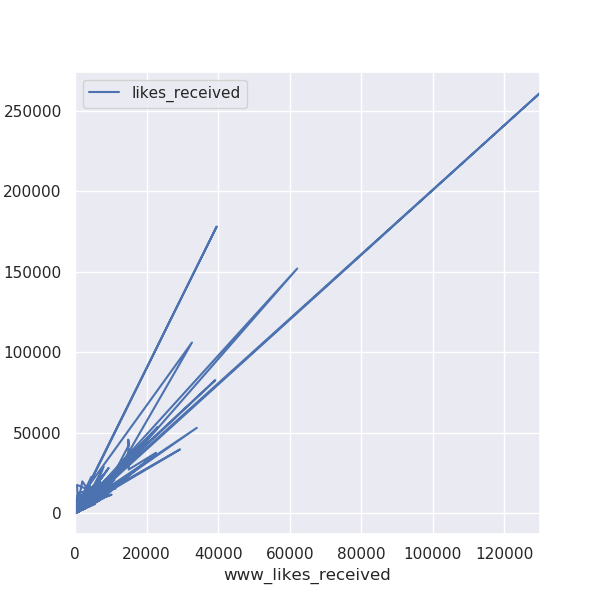

In [41]:
plt.figure()
plt.scatter(df.www_likes_received ,  df.likes_received  , alpha=0.4, color='red')
plt.xlim(xmin=0 , xmax=df.www_likes_received.quantile(.95))
plt.ylim(ymin=0 , ymax=df.likes_received.quantile(.95))
df.plot(kind="line" , x="www_likes_received" , y="likes_received")
plt.show()

In [42]:
lm = np.polyfit(x=df.www_likes_received , y=df.likes_received , deg=1)

In [43]:
linear_model = df.www_likes_received.apply(lambda x: x*lm[0] +lm[1])

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


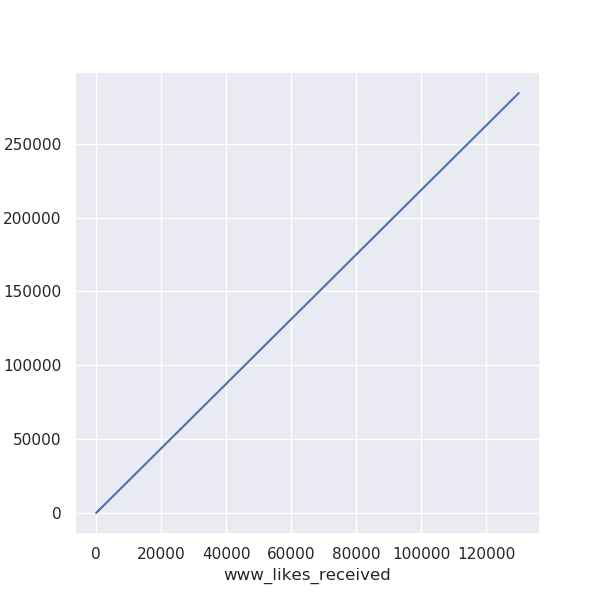

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [44]:
plt.figure()
sns.lineplot(x=df.www_likes_received , y=linear_model)
plt.show()

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


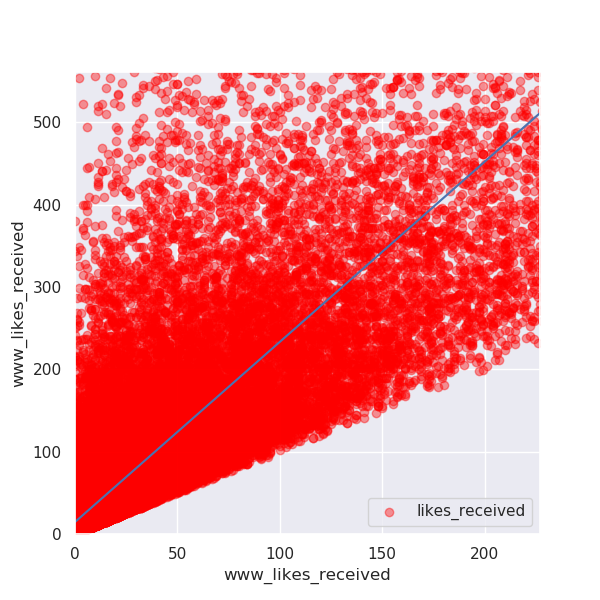

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [45]:
lm = np.polyfit(x=df.www_likes_received , y=df.likes_received , deg=1)
linear_model = df.www_likes_received.apply(lambda x: x*lm[0] +lm[1])

plt.figure()
plt.scatter(df.www_likes_received ,  df.likes_received  , alpha=0.4, color='red')
sns.lineplot(x=df.www_likes_received , y=linear_model)

plt.xlim(xmin=0 , xmax=df.www_likes_received.quantile(.95))
plt.ylim(ymin=0 , ymax=df.likes_received.quantile(.95))

plt.show()

In [46]:
df.corr()['www_likes_received']['likes_received']

0.9479901803455516

# Understanding the noise Age to age month

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


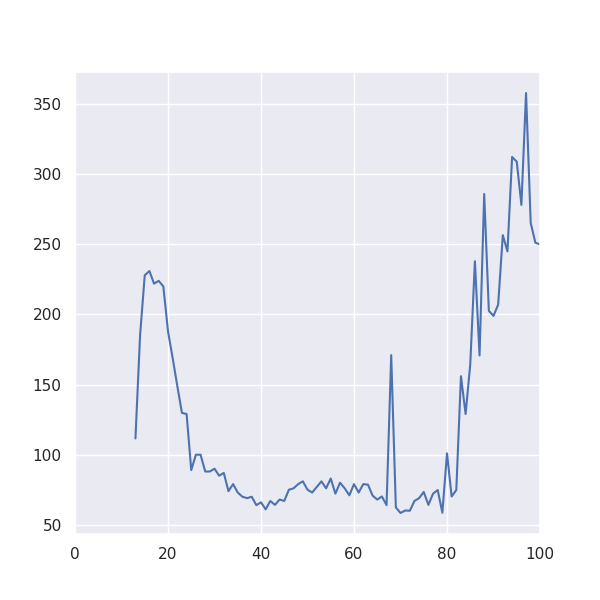

In [47]:
plt.figure()
age_mean_median_df["quan_60"].plot()
plt.show()

In [48]:
df.head(1)

userid  age  dob_day  dob_year  dob_month gender  tenure  friend_count  \
0  2094382   14       19      1999         11   male   266.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0

In [59]:
age_with_month = df.apply(lambda x : x["age"] + (1 - x["dob_month"] / 12) , axis=1)

In [60]:
age_with_month

0        14.083333
1        14.083333
2        14.083333
3        14.000000
4        14.000000
           ...    
98998    68.666667
98999    18.750000
99000    15.583333
99001    23.666667
99002    39.583333
Length: 99003, dtype: float64

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


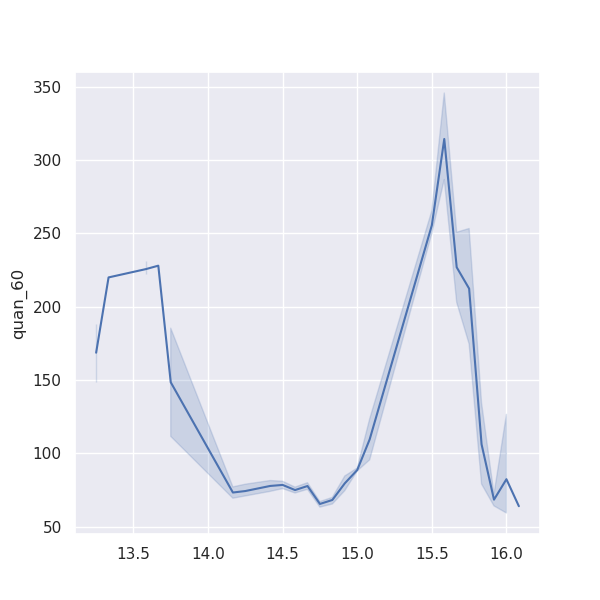

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [61]:
plt.figure()
sns.lineplot(x= age_with_month, y=age_mean_median_df["quan_60"])
plt.show()

In [62]:
df["age_with_month"] = age_with_month

In [63]:
df.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  age_with_month  
0                      0          0                   0       14.083333  
1                      0          0                   0       14.083333  
2                      0          0                   0       14.083333  
3                      0          0                   0       14.000000  
4                      0          0                   0       14.000000

In [65]:
age_month_group =  df.groupby(df.age_with_month)

In [66]:
age_month_mean = age_month_group.friend_count.mean()

age_month_median  = age_month_group.friend_count.median()

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


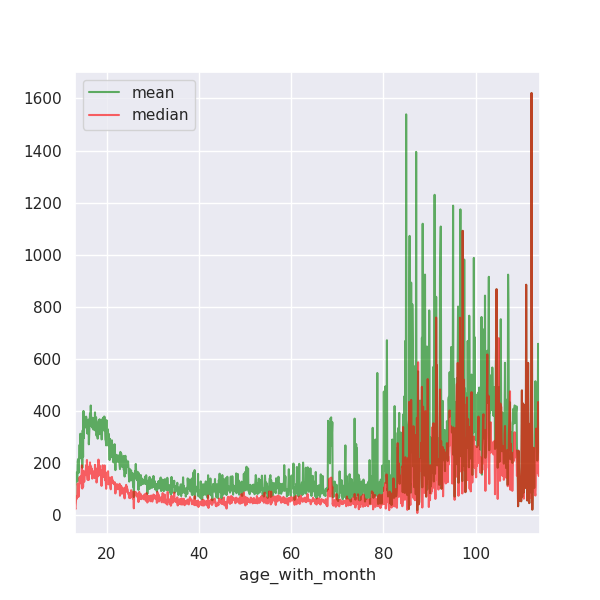

In [76]:
plt.figure()
age_month_mean.plot(color="green" , alpha=0.6)
age_month_median.plot(color="red" , alpha=0.6)
plt.legend(["mean" , "median"])
plt.show()

In [94]:
age_month_group =  df.groupby(df.age_with_month)

In [118]:
df.loc[df.age <=70]

userid  age  dob_day  dob_year  dob_month  gender  tenure  \
0      2094382   14       19      1999         11    male   266.0   
1      1192601   14        2      1999         11  female     6.0   
2      2083884   14       16      1999         11    male    13.0   
3      1203168   14       25      1999         12  female    93.0   
4      1733186   14        4      1999         12    male    82.0   
...        ...  ...      ...       ...        ...     ...     ...   
98998  1268299   68        4      1945          4  female   541.0   
98999  1256153   18       12      1995          3  female    21.0   
99000  1195943   15       10      1998          5  female   111.0   
99001  1468023   23       11      1990          4  female   416.0   
99002  1397896   39       15      1974          5  female   397.0   

       friend_count  friendships_initiated  likes  likes_received  \
0                 0                      0      0               0   
1                 0                      0      0               0   
2                 0                      0      0               0   
3                 0                      0      0               0   
4                 0                      0      0               0   
...             ...                    ...    ...             ...   
98998          2118                    341   3996           18089   
98999          1968                   1720   4401           13412   
99000          2002                   1524  11959           12554   
99001          2560                    185   4506            6516   
99002          2049                    768   9410           12443   

       mobile_likes  mobile_likes_received  www_likes  www_likes_received  \
0                 0                      0          0                   0   
1                 0                      0          0                   0   
2                 0                      0          0                   0   
3                 0                      0          0                   0   
4                 0                      0          0                   0   
...             ...                    ...        ...                 ...   
98998          3505                  11887        491                6202   
98999          4399                  10592          2                2820   
99000         11959                  11462          0                1092   
99001          4506                   5760          0                 756   
99002          9410                   9530          0                2913   

       age_with_month  
0           14.083333  
1           14.083333  
2           14.083333  
3           14.000000  
4           14.000000  
...               ...  
98998       68.666667  
98999       18.750000  
99000       15.583333  
99001       23.666667  
99002       39.583333  

[91031 rows x 16 columns]

In [111]:
age_month_mean = age_month_group.friend_count.mean()

age_month_median  = age_month_group.friend_count.median()

In [119]:
df2 = df.loc[df.age <=70]
age_month_group_b70 = df2.groupby(df2.age_with_month)

In [121]:
age_month_mean_b70 = age_month_group_b70.friend_count.mean()
age_month_median_b70  = age_month_group_b70.friend_count.median()

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


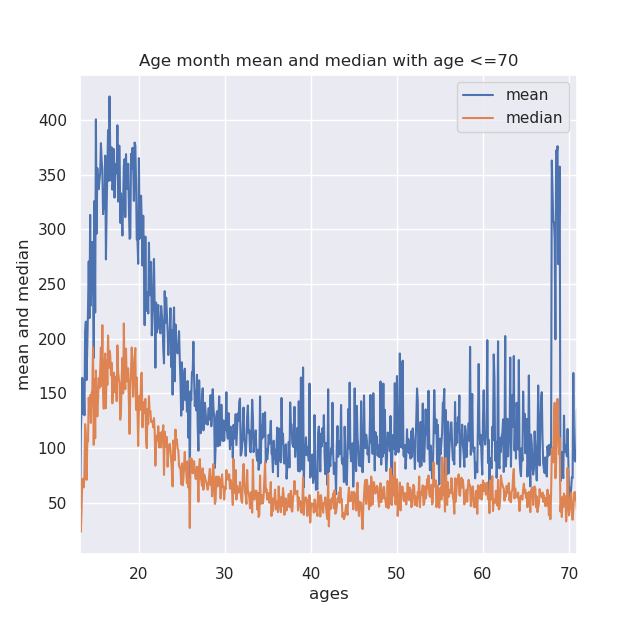

In [124]:
plt.figure()
age_month_mean_b70.plot()
age_month_median_b70.plot()
plt.legend(["mean" , "median"])
plt.title("Age month mean and median with age <=70")
plt.xlabel("ages")
plt.ylabel("mean and median")
plt.show()